# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(f"{url}{city}&appid={weather_api_key}")
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (F)": round((city_max_temp - 273.15) * 9/5 + 32),
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leer
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | nar'yan-mar
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | at taj
Processing Record 10 of Set 1 | sao cristovao
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | yuli
Processing Record 15 of Set 1 | masuguru
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | ourilandia do norte
City not found. Skipping...
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | 'ain benian
Processing 

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            593
Lat             593
Lng             593
Max Temp (F)    593
Humidity        593
Cloudiness      593
Wind Speed      593
Country         593
Date            593
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,leer,53.2316,7.4610,59,86,100,2.06,DE,1682276713
1,aasiaat,68.7098,-52.8699,33,99,100,4.49,GL,1682276714
2,adamstown,-25.0660,-130.1015,76,88,100,6.99,PN,1682276714
3,puerto ayora,-0.7393,-90.3518,88,87,100,5.81,EC,1682276715
4,thompson,55.7435,-97.8558,32,55,20,6.17,CA,1682276615


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_date_df = pd.to_datetime(city_data_df['Date'], unit='s')

date = city_data_df['Date'].mean()
date = datetime.datetime.fromtimestamp(date).strftime('%Y-%m-%d')

print(date)
# Display sample data
city_data_df.head()



2023-04-23


,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leer,53.2316,7.4610,59,86,100,2.06,DE,1682276713
1,aasiaat,68.7098,-52.8699,33,99,100,4.49,GL,1682276714
2,adamstown,-25.0660,-130.1015,76,88,100,6.99,PN,1682276714
3,puerto ayora,-0.7393,-90.3518,88,87,100,5.81,EC,1682276715
4,thompson,55.7435,-97.8558,32,55,20,6.17,CA,1682276615


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

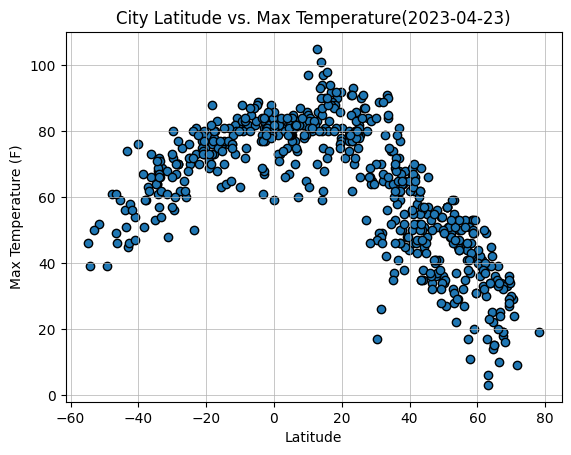

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp (F)'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linewidth=0.5)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

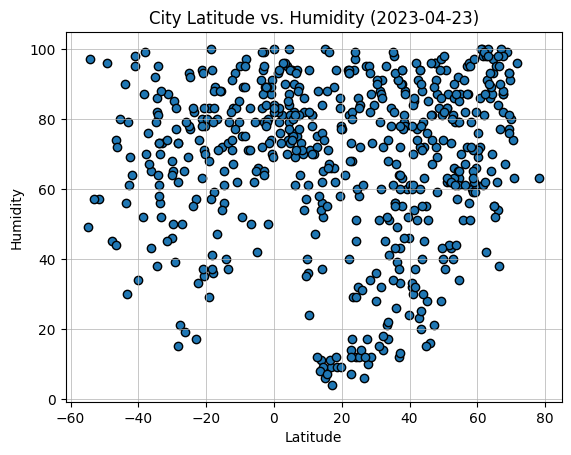

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linewidth=0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

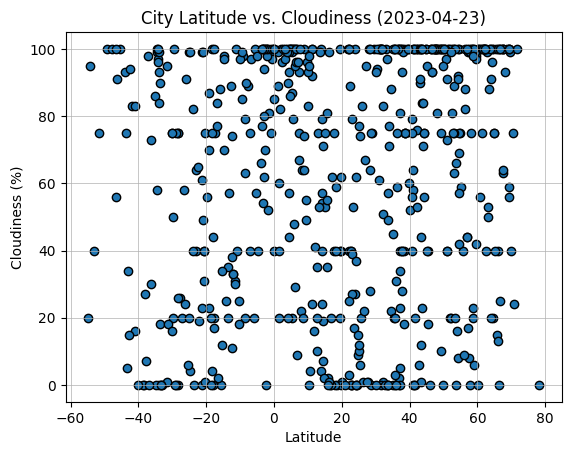

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linewidth=0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

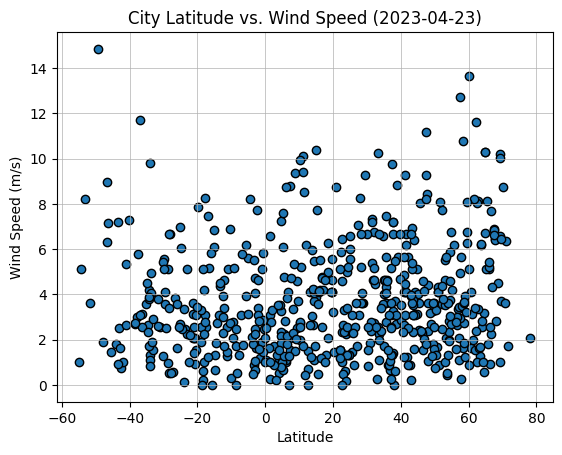

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors= 'black')

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linewidth=0.5)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leer,53.2316,7.4610,59,86,100,2.06,DE,1682276713
1,aasiaat,68.7098,-52.8699,33,99,100,4.49,GL,1682276714
4,thompson,55.7435,-97.8558,32,55,20,6.17,CA,1682276615
5,nar'yan-mar,67.6713,53.0870,19,91,26,6.43,RU,1682276715
8,at taj,24.2049,23.2857,86,16,59,4.97,LY,1682276717


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,76,88,100,6.99,PN,1682276714
3,puerto ayora,-0.7393,-90.3518,88,87,100,5.81,EC,1682276715
6,west island,-12.1568,96.8225,81,89,40,4.63,CC,1682276716
7,edinburgh of the seven seas,-37.0676,-12.3116,63,78,100,11.71,SH,1682276716
9,sao cristovao,-11.0147,-37.2064,84,65,40,5.14,BR,1682276717


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8385320683552792


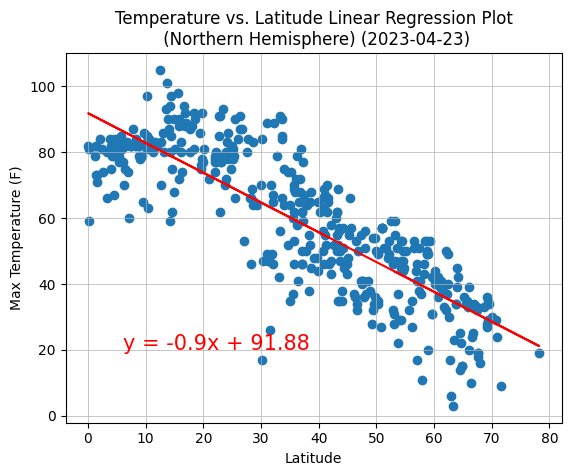

In [63]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp (F)"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# put does in
plt.scatter(x_values,y_values)
# draw line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")

# add extras
plt.grid(linewidth=0.5)

plt.title(f"Temperature vs. Latitude Linear Regression Plot\n (Northern Hemisphere) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-value is: {rvalue}")

The r-value is: 0.7859787037431727


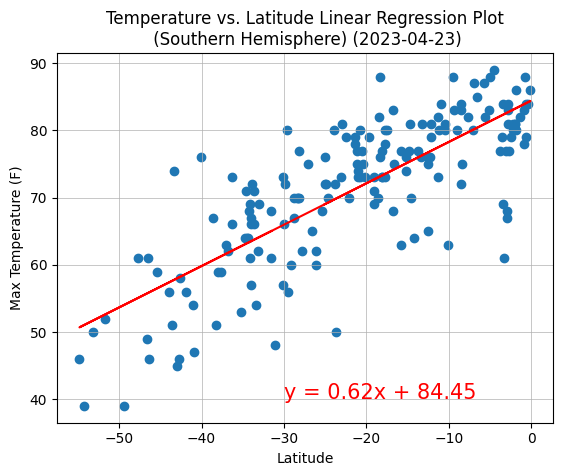

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp (F)"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# put does in
plt.scatter(x_values,y_values)
# draw line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# add extras
plt.grid(linewidth=0.5)

plt.title(f"Temperature vs. Latitude Linear Regression Plot\n (Southern Hemisphere) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** The highest temperature can be seen at 0(equator). Temperature seems to decrease the further we travel from the equator according to the data we studied. We can be fairly confident in this trend with an r-value close to 1.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11662257815292774


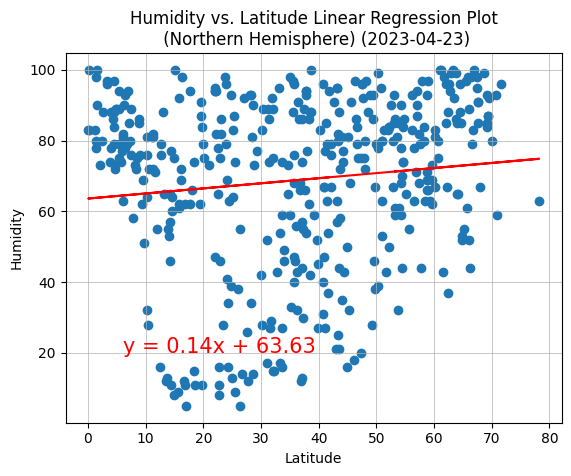

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# put does in
plt.scatter(x_values,y_values)
# draw line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")

# add extras
plt.grid(linewidth=0.5)

plt.title(f"Humidity vs. Latitude Linear Regression Plot\n (Northern Hemisphere) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

The r-value is: 0.25256367131415763


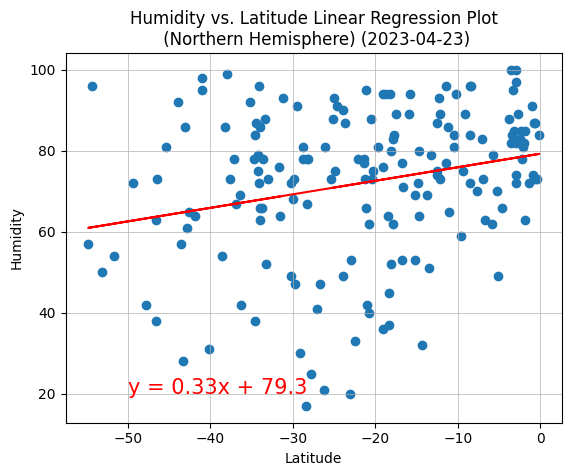

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# put does in
plt.scatter(x_values,y_values)
# draw line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# add extras
plt.grid(linewidth=0.5)

plt.title(f"Humidity vs. Latitude Linear Regression Plot\n (Northern Hemisphere) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** with an r-value less then .3, the coorelation is weak. We should not expect humidity to be related to latitude according to this data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1267378464839624


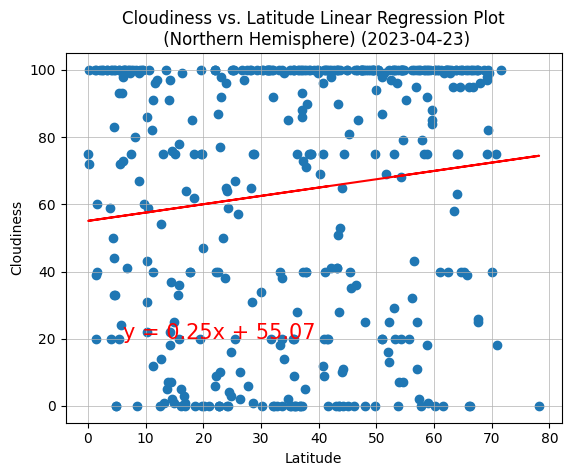

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# put does in
plt.scatter(x_values,y_values)
# draw line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")

# add extras
plt.grid(linewidth=0.5)

plt.title(f"Cloudiness vs. Latitude Linear Regression Plot\n (Northern Hemisphere) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

The r-value is: 0.16383681293866528


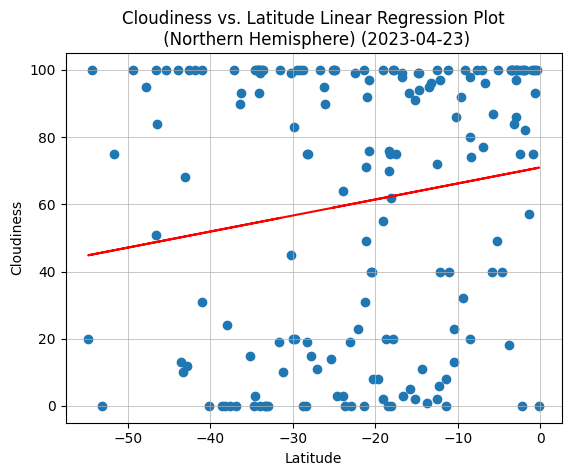

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# put does in
plt.scatter(x_values,y_values)
# draw line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")

# add extras
plt.grid(linewidth=0.5)

plt.title(f"Cloudiness vs. Latitude Linear Regression Plot\n (Northern Hemisphere) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** with an r-value less then .3, the coorelation is weak. We should not expect cloudiness to be related to latitude according to this data.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17360788584107298


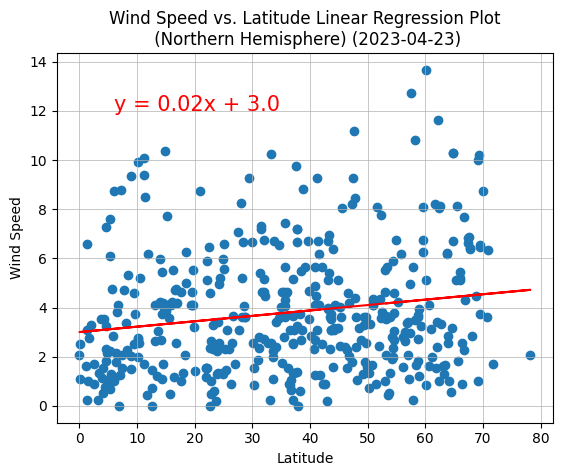

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# put does in
plt.scatter(x_values,y_values)
# draw line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,12),fontsize=15,color="red")

# add extras
plt.grid(linewidth=0.5)

plt.title(f"Wind Speed vs. Latitude Linear Regression Plot\n (Northern Hemisphere) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

The r-value is: -0.18493082056807128


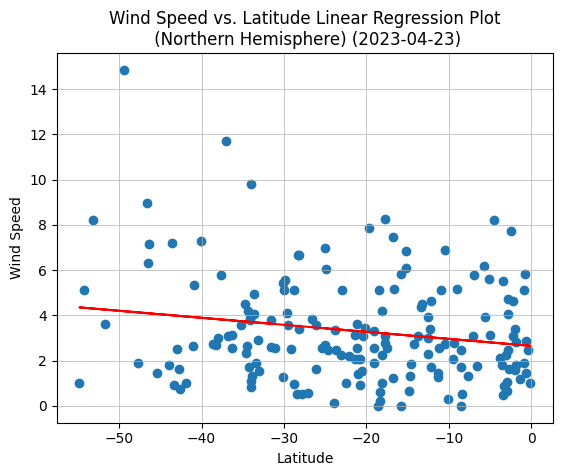

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# put does in
plt.scatter(x_values,y_values)
# draw line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,12),fontsize=15,color="red")

# add extras
plt.grid(linewidth=0.5)

plt.title(f"Wind Speed vs. Latitude Linear Regression Plot\n (Northern Hemisphere) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** with an r-value less then .3, the coorelation is weak. We should not expect wind speed to be related to latitude according to this data.